In [ ]:
#https://www.geeksforgeeks.org/exponential-smoothing-for-time-series-forecasting/

In [1]:
# Import packages
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns

In [2]:
time_series_data = pd.read_csv("AirPassengers.csv")
time_series_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
time_series_data.shape

(144, 2)

In [4]:
# Convert column year in datetime format
time_series_data['Month'] = pd.to_datetime(time_series_data['Month'])
time_series_data = time_series_data.set_index('Month')

In [5]:
time_series_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '#passenger')

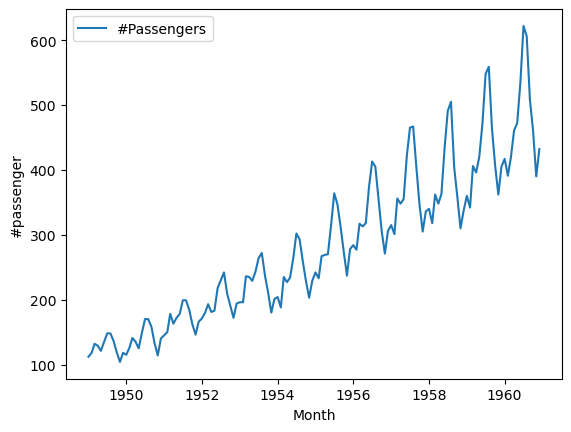

In [6]:
sns.lineplot(time_series_data)
plt.ylabel("#passenger")

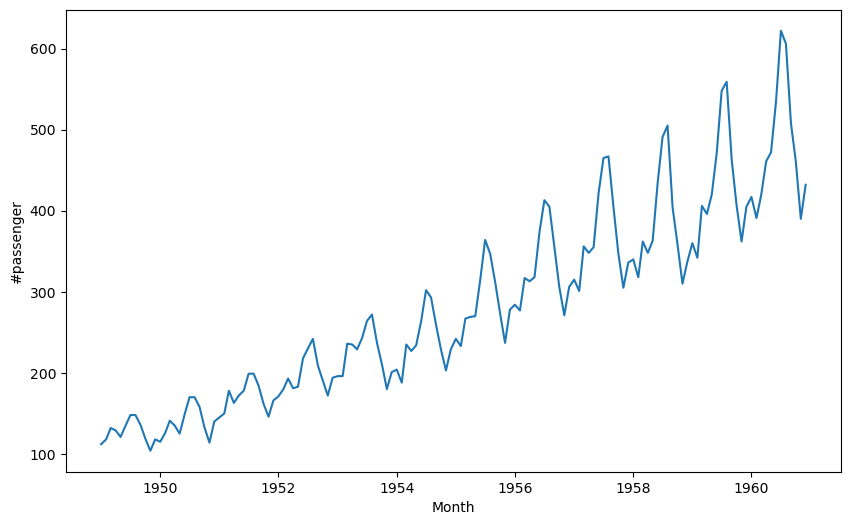

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index , time_series_data['#Passengers'])
plt.xlabel('Month')
plt.ylabel('#passenger')
plt.show()

In [8]:
#We can see that the number of passengers appears to be increasing over time, with some seasonality as well.

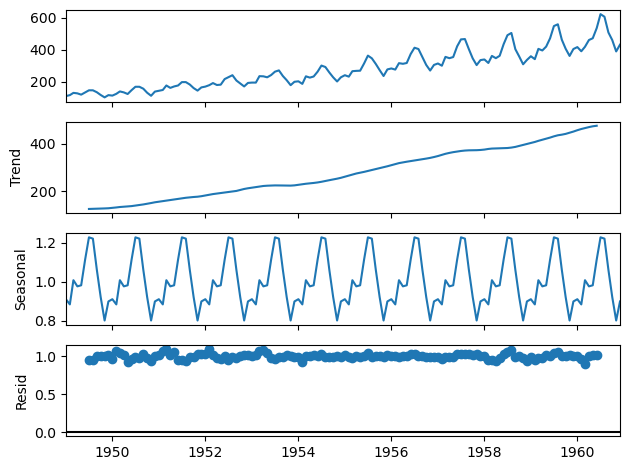

In [9]:
# Decomposition of time series - Multiplicative model
result = seasonal_decompose(time_series_data[['#Passengers']], model='multiplicative')
result.plot()
plt.show()

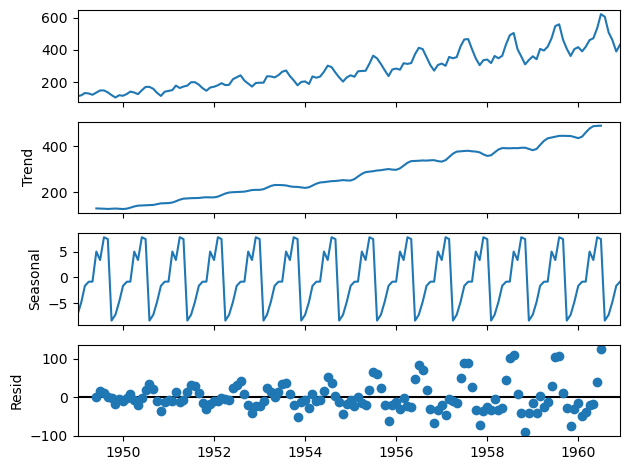

In [10]:
result = seasonal_decompose(time_series_data[['#Passengers']], model='additive', period = 10)
result.plot()
plt.show()

In [27]:
pip install pymannkendall

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pymannkendall as mk

# Perform Mann-Kendall test
# H0: There is no monotonic trend in the series

mk.original_test(time_series_data['#Passengers'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=14.381610025544802, Tau=0.8087606837606838, s=8327.0, var_s=335164.3333333333, slope=2.451216287678477, intercept=90.23803543098887)

In [25]:
#pvalue <0.5 => reject Ho. There is a trend present 

In [12]:
train_df=time_series_data[:int(time_series_data.shape[0]*0.7)]
test_df=time_series_data[int(time_series_data.shape[0]*0.7):]

In [13]:
train_df.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
train_df.shape

(100, 1)

In [15]:
test_df.shape

(44, 1)

In [16]:
#SINGLE EXPONENTIAL SMOOTHNING

from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(train_df)
model_single_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

1957-05-01    348.0
1957-06-01    348.0
1957-07-01    348.0
1957-08-01    348.0
1957-09-01    348.0
1957-10-01    348.0
Freq: MS, dtype: float64


In [18]:
forecast_single = model_single_fit.forecast(40)

In [19]:
model_single_fit.params

{'smoothing_level': 0.9999999850984761,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

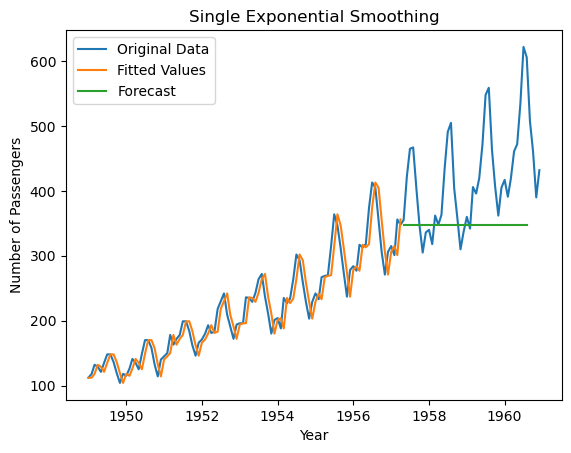

In [20]:
plt.plot(time_series_data, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

In [21]:
#DOUBLE EXPONENTIAL SMOOTHNING

In [22]:
from statsmodels.tsa.api import Holt

model_double = Holt(train_df)
model_double_fit = model_double.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

1957-05-01    352.149928
1957-06-01    356.289994
1957-07-01    360.430061
1957-08-01    364.570127
1957-09-01    368.710193
1957-10-01    372.850259
Freq: MS, dtype: float64


In [24]:
forecast_double = model_double_fit.forecast(40)

In [25]:
model_double_fit.params

{'smoothing_level': 0.999190910127339,
 'smoothing_trend': 0.007412899330137531,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

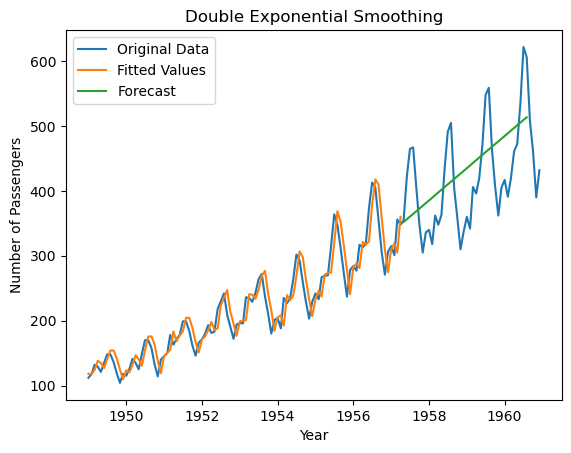

In [26]:
plt.plot(time_series_data, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()

In [27]:
#TRIPLE EXPONENTIAL SMOOTHNING

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(train_df, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)

1957-05-01    351.239556
1957-06-01    403.308146
1957-07-01    439.936813
1957-08-01    426.799787
1957-09-01    375.972869
1957-10-01    329.109279
Freq: MS, dtype: float64


In [30]:
forecast_triple = model_triple_fit.forecast(40)

In [31]:
model_triple_fit.params

{'smoothing_level': 0.2550250780260589,
 'smoothing_trend': 1.800645950512257e-09,
 'smoothing_seasonal': 0.7449749171421274,
 'damping_trend': nan,
 'initial_level': 118.7941010710188,
 'initial_trend': 2.3251129433904585,
 'initial_seasons': array([ -9.11783738,  -3.51563904,   8.9645761 ,   3.69243412,
         -5.06898002,   9.03423164,  21.25027253,  18.82286355,
          4.68963164, -14.11839322, -28.56031593, -11.9475752 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

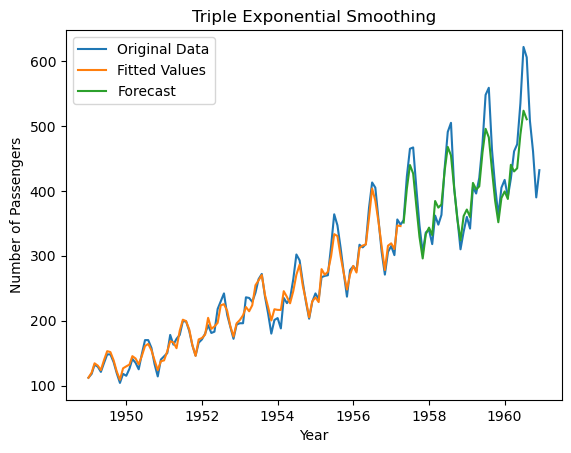

In [32]:
plt.plot(time_series_data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

In [33]:
residuals = model_triple_fit.resid
residuals.head()

Month
1949-01-01   -0.001377
1949-02-01   -1.928337
1949-03-01   -2.241891
1949-04-01   -1.723123
1949-05-01   -2.847382
dtype: float64

In [36]:
test_predictions = model_triple_fit.forecast(len(test_df)).rename('HW Test Forecast')

In [37]:
test_predictions.tail()

1960-08-01    510.503853
1960-09-01    459.676935
1960-10-01    412.813345
1960-11-01    379.604793
1960-12-01    417.035232
Freq: MS, Name: HW Test Forecast, dtype: float64

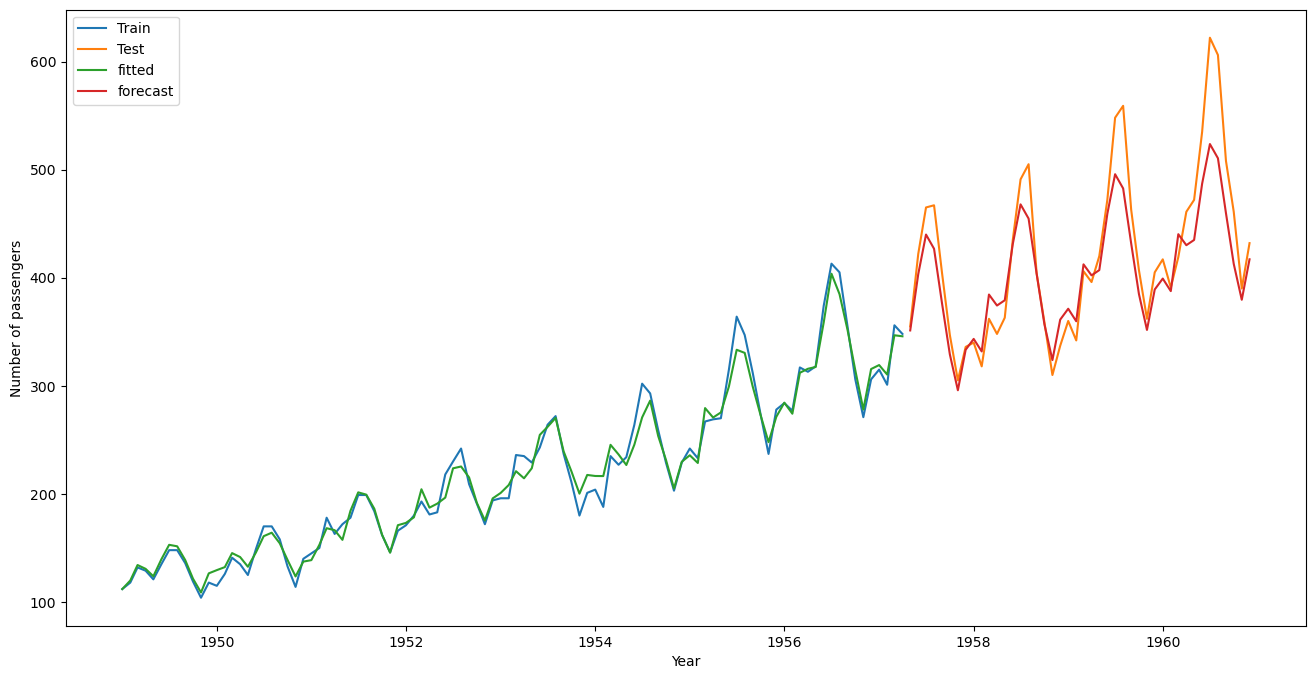

In [38]:
plt.figure(figsize=(16,8))
plt.plot(train_df['#Passengers'],label='Train')
plt.plot(test_df['#Passengers'], label = 'Test')
plt.plot(model_triple_fit.fittedvalues , label='fitted')
plt.plot(test_predictions , label ='forecast')
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_df['#Passengers'], model_triple_fit.fittedvalues)
print('MAPE for Train Data:', mape_train)

MAPE for Train Data: 0.035383571364856876


In [40]:
mape_test = mean_absolute_percentage_error(test_df['#Passengers'],test_predictions)
print('MAPE for Test Data:', mape_test)

MAPE for Test Data: 0.05397259855132907


In [ ]:
#https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [ ]:
#A time series is stationary if its statistical properties (mean, variance, and autocorrelation) do not change over time. 
#A non-stationary series often shows trends, seasonality, or a changing variance

In [41]:
#ADF TEST
#Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
#Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
#p-value < 0.05 – Reject Null Hypothesis(HO)

In [42]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller Test:")
dftest = adfuller(time_series_data['#Passengers'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
#Here the condition is not satisfied so we fail to reject the null hypothesis i.e Series is NOT stationary

In [43]:
#KPSS TEST
#Null Hypothesis (HO): Series is trend stationary or series has no unit root.
#Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.
#p-value < 0.05 –  Reject Null Hypothesis(HO)

In [44]:
from statsmodels.tsa.stattools import kpss
kp = kpss(time_series_data['#Passengers'])
p = kp[1]

print("p-value for KPSS test (untransformed) = ", p)


p-value for KPSS test (untransformed) =  0.01


C:\Users\Tanvi.Koyande\AppData\Local\Temp\ipykernel_16604\662183018.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kp = kpss(time_series_data['#Passengers'])


In [45]:
#Here p-value is less than 0.05 so reject Null Hypothesis i.e data is NOT trend stationary

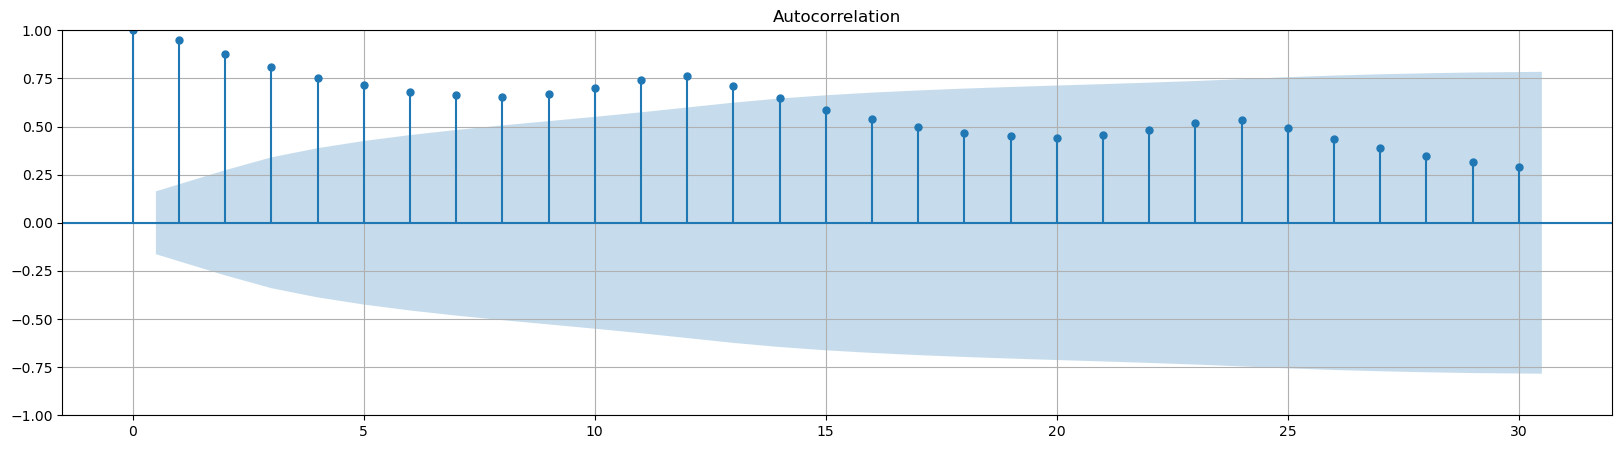

In [46]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(time_series_data['#Passengers'] , ax=plt.gca(), lags =30 )
plt.show()

In [ ]:
#ACF decays slowly, a sinusoidal or linear decay, or remains high for many lags --> NOT STATIONARY.
#Values close to 1 or -1 at a lag suggest strong positive or negative correlation.
#Values near 0 indicate no correlation.

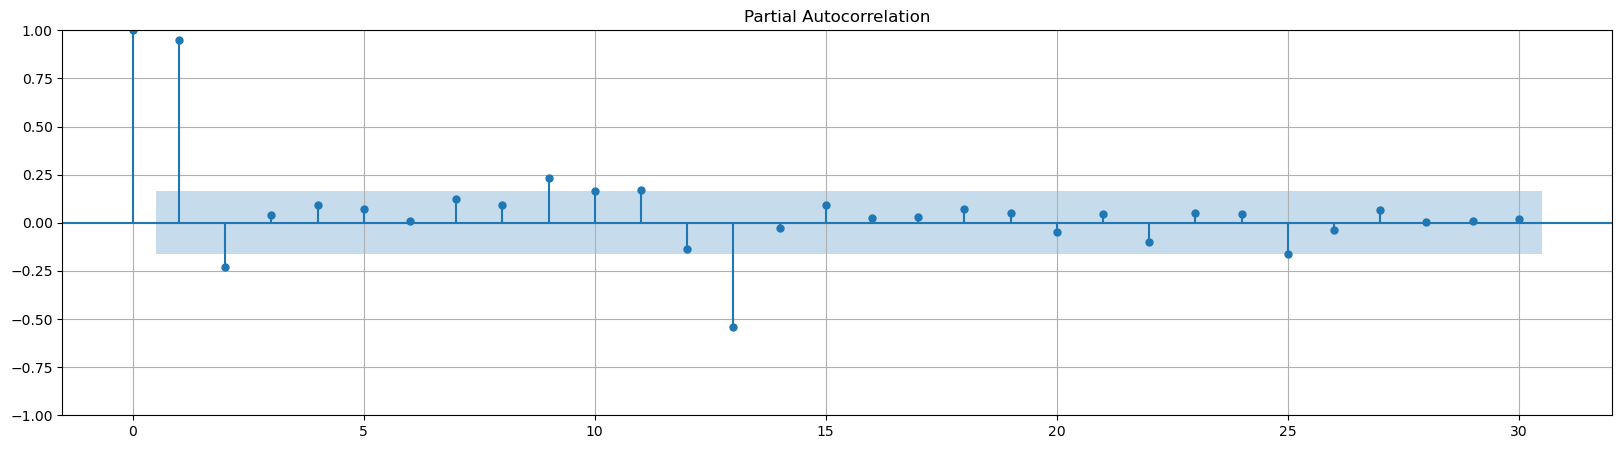

In [47]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(time_series_data['#Passengers'] , ax=plt.gca(), lags = 30)
plt.show()

In [79]:
#PACF may show significant correlations across multiple lags
#With the help of ACF and PACF we can see that values of lag are falling outside the significant region so we can conclude that our data is non-stationary

In [48]:
#So to make the data stationary we do differencing

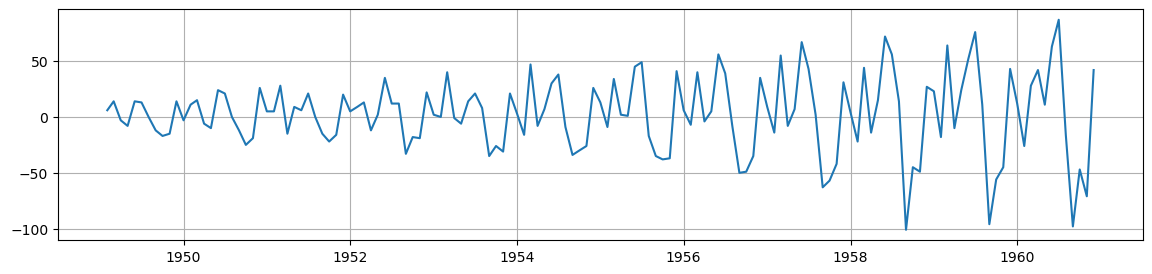

In [49]:
#NON-SEASONAL DIFFERENCING
diff = time_series_data['#Passengers'].diff().dropna()     # TRYING TO MAKE DATA TREND STATIONARY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff)
plt.show()

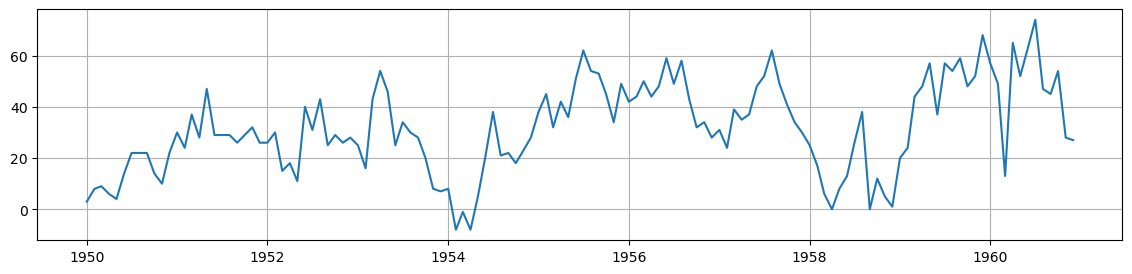

In [50]:
#SEASONAL DIFFERENCING
sdiff = time_series_data['#Passengers'].diff(periods = 12).dropna()          # TRYING TO REMOVE SEASONALITY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sdiff)
plt.show()

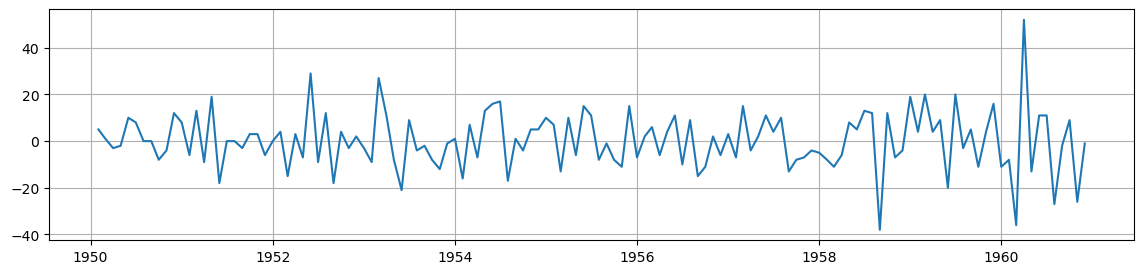

In [51]:
#SEASONAL AND NON-SEASONAL DIFFERENCING
sdiff = time_series_data['#Passengers'].diff(periods = 12).dropna()  # seasonal differencing
sddiff = sdiff.diff().dropna()                          # non-seasonal differencing  # 1ST ORDER DIFFERENCING
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sddiff)

plt.show()

In [53]:
#ADF
#Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
#Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
#p-value < 0.05 – Reject Null Hypothesis(HO)

print("Results of Dickey-Fuller Test:")
dftest = adfuller(sddiff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.559562e+01
p-value                        1.856512e-28
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


In [91]:
## SERIES IS STATIONARY

In [54]:
#KPSS TEST
#Null Hypothesis (HO): Series is trend stationary or series has no unit root.
#Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.
#p-value < 0.05 –  Reject Null Hypothesis(HO)

from statsmodels.tsa.stattools import kpss
kp = kpss(sddiff)
p = kp[1]

print("p-value for KPSS test (untransformed) = ", p)

p-value for KPSS test (untransformed) =  0.1


C:\Users\Tanvi.Koyande\AppData\Local\Temp\ipykernel_16604\2026258703.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kp = kpss(sddiff)


In [55]:
## Data is trend stationary

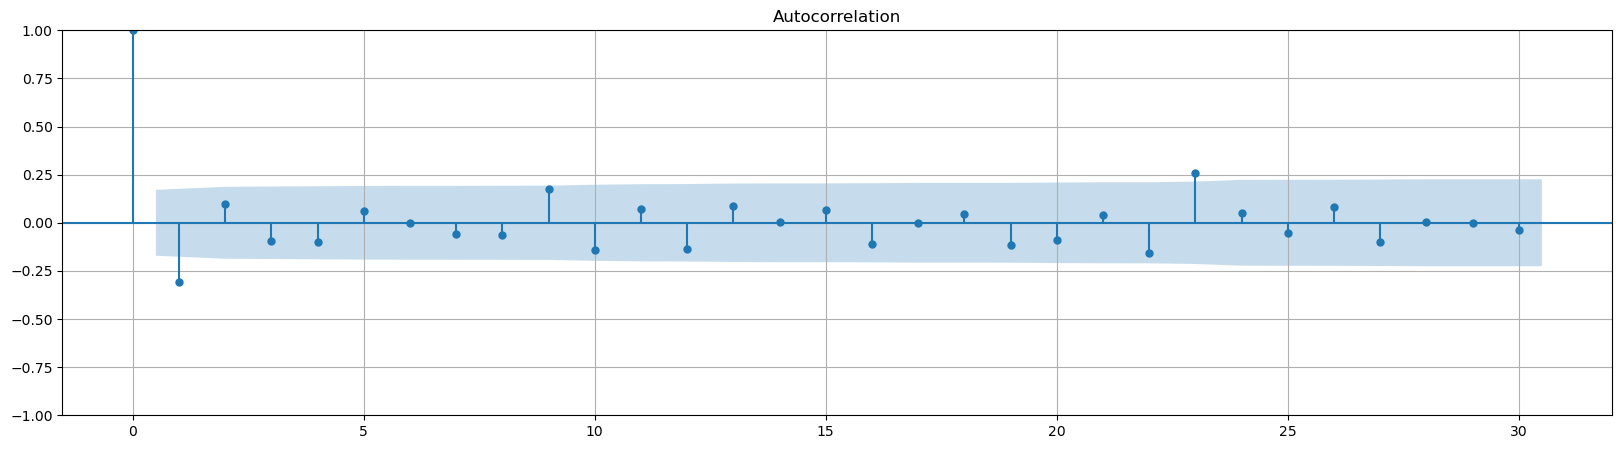

In [56]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(sddiff , ax=plt.gca(), lags = 30)
plt.show()

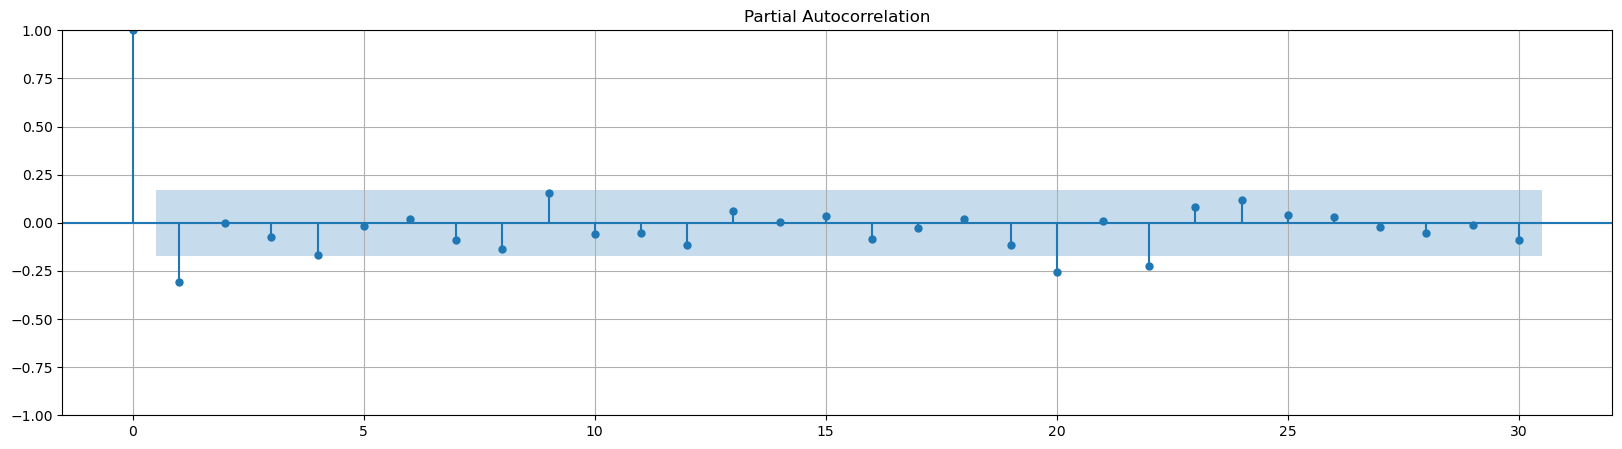

In [57]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(sddiff , ax=plt.gca(), lags = 30)
plt.show()

In [ ]:
#https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

In [58]:
#The ACF and PACF graphs also give the same result that the data is stationory after first order differencing

In [59]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 640.0 kB/s eta 0:00:01
   --------------- ------------------------ 245.8/614.7 kB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 512.0/614.7 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------- ------------------------------ 0.6/2.8 MB 20.1 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.8 MB 14.3 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 13.0 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 13.0 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 13.0 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 13.0 MB/s eta 0:00:01


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [60]:
pip install pymannkendall pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
from pmdarima.arima import auto_arima
model_auto_arima = auto_arima(time_series_data['#Passengers'], seasonal=True, trace = True , m=12)
model_auto_arima_fit = model_auto_arima.fit(time_series_data['#Passengers'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.09 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.35 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.16 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.36 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.08 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.14 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.28 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.28 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.55 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

In [62]:
print(model_auto_arima_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Fri, 03 Jan 2025   AIC                           1017.847
Time:                                     11:48:09   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5959      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

In [63]:
#INTERPRETATION ON ACF AND PACF

In [64]:
import statsmodels.api as sm
model_autosarima_dom1 = sm.tsa.statespace.SARIMAX(train_df['#Passengers'], order=(1,1,1), seasonal_order = (1,1,1,12))
model_autosarima_dom1_fit = model_autosarima_dom1.fit()

print(model_autosarima_dom1_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -318.808
Date:                            Fri, 03 Jan 2025   AIC                            647.617
Time:                                    11:48:35   BIC                            659.947
Sample:                                01-01-1949   HQIC                           652.582
                                     - 04-01-1957                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6025      0.338     -1.780      0.075      -1.266       0.061
ma.L1          0.3854      0.375   

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


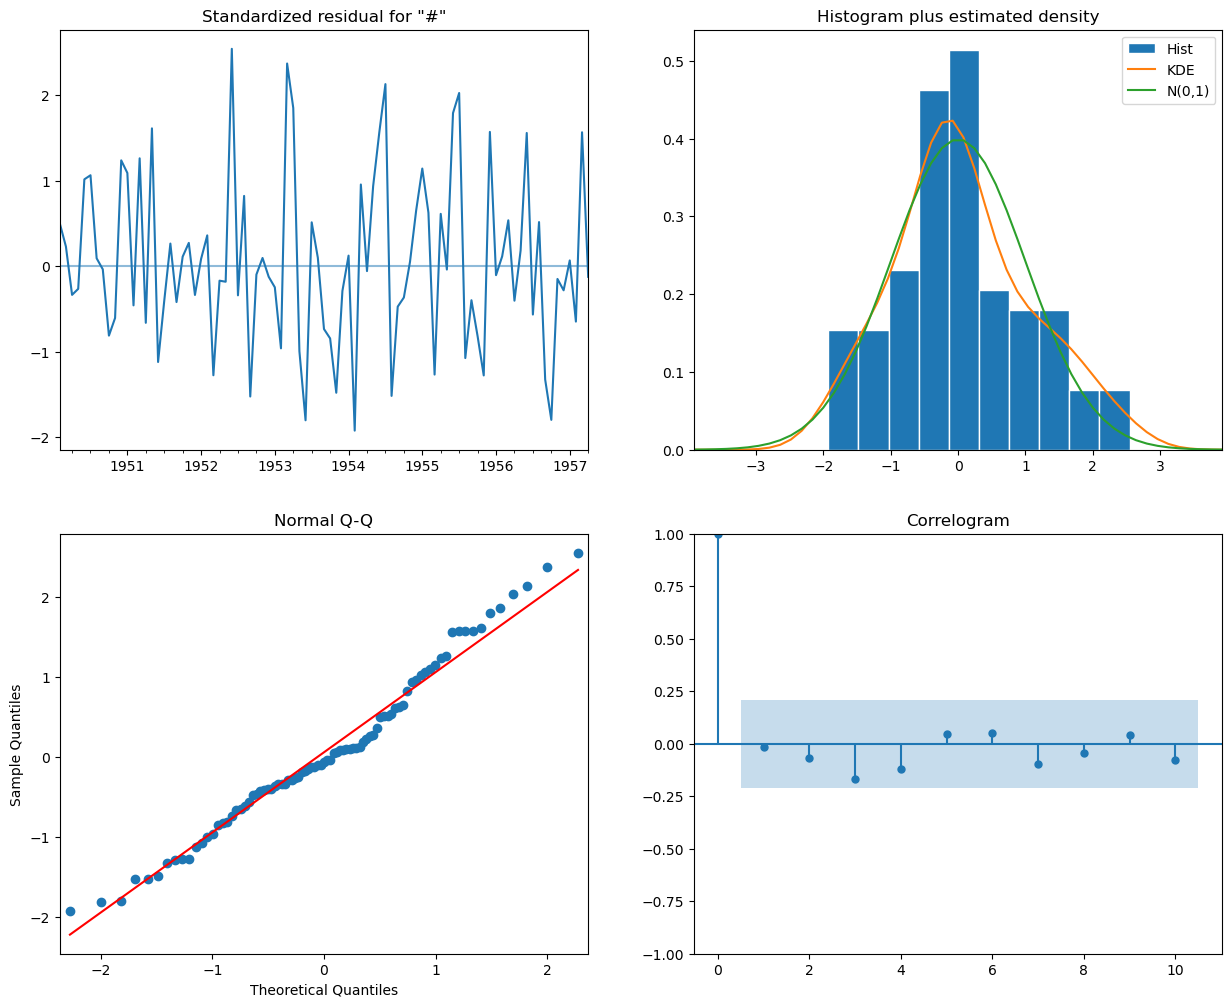

In [65]:
model_autosarima_dom1_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [68]:
test_predictions1 = model_autosarima_dom1_fit.forecast(len(test_df))
forecast_further1=model_autosarima_dom1_fit.forecast(len(test_df['#Passengers'])+90)
forecast_further1 = forecast_further1[test_df.index.max():]
forecast_further1

1960-12-01    459.224343
1961-01-01    467.691652
1961-02-01    454.799528
1961-03-01    507.510065
1961-04-01    500.054959
                 ...    
1968-02-01    719.993607
1968-03-01    772.689376
1968-04-01    765.237796
1968-05-01    771.865136
1968-06-01    824.849805
Freq: MS, Name: predicted_mean, Length: 91, dtype: float64

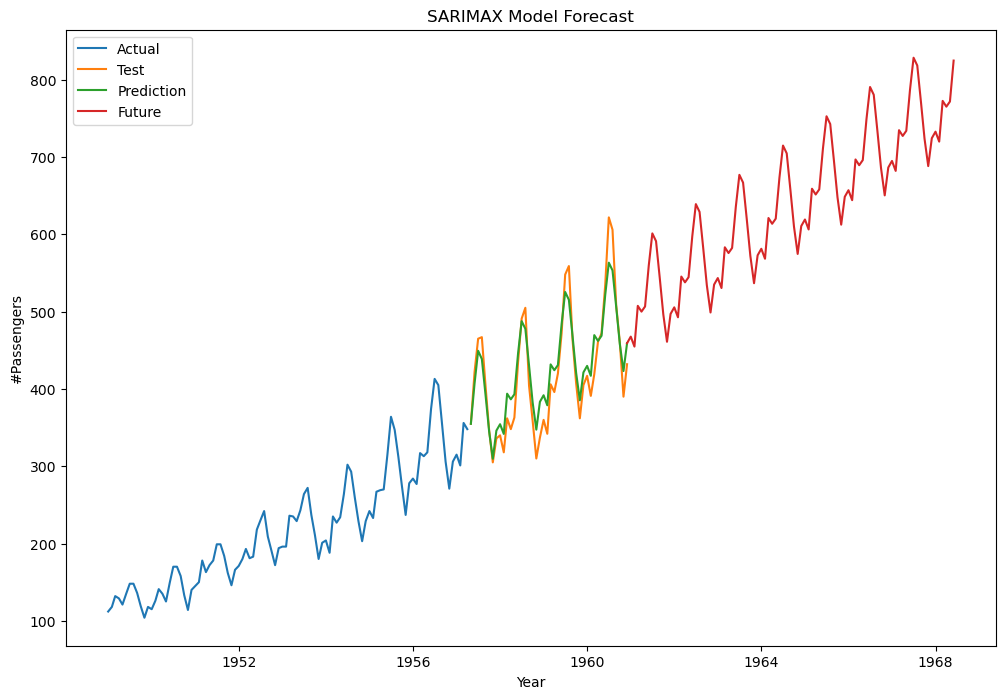

In [69]:
plt.figure(figsize=(12, 8))

plt.plot(train_df['#Passengers'], label='Actual')
plt.plot(test_df['#Passengers'], label='Test')
plt.plot(test_predictions1, label='Prediction')
plt.plot(forecast_further1, label='Future')

plt.title('SARIMAX Model Forecast')
plt.xlabel('Year')
plt.ylabel('#Passengers')
plt.legend()

plt.show()

In [70]:
mape_train = mean_absolute_percentage_error(train_df['#Passengers'], model_autosarima_dom1_fit.fittedvalues)
print('MAPE for Train Data:', mape_train)

MAPE for Train Data: 0.05292896562888002


In [71]:
mape_test = mean_absolute_percentage_error(test_df['#Passengers'],test_predictions1)
print('MAPE for TEST Data:', mape_test)

MAPE for TEST Data: 0.05284355119506296


In [72]:
#BASED ON AUTO ARIMA BEST

In [73]:
model_autosarima_dom = sm.tsa.statespace.SARIMAX(time_series_data['#Passengers'], order=(2,1,1), seasonal_order = (0,1,0,12))
model_autosarima_dom_fit = model_autosarima_dom.fit()

print(model_autosarima_dom_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Fri, 03 Jan 2025   AIC                           1017.847
Time:                                     12:01:11   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5959      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


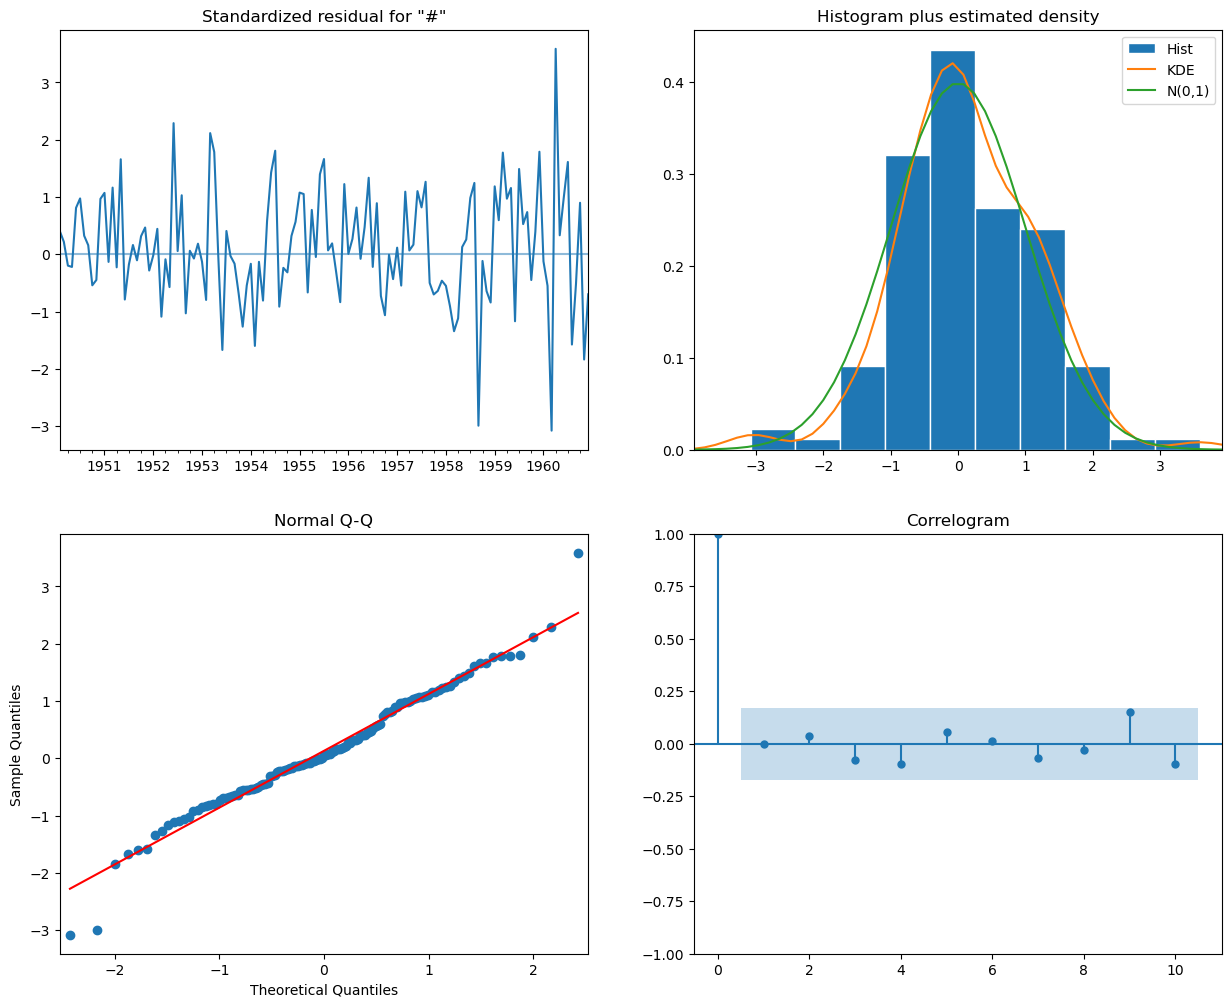

In [85]:
model_autosarima_dom_fit.plot_diagnostics(figsize=(15,12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

In [74]:
test_predictions = model_autosarima_dom_fit.forecast(len(test_df))
forecast_further=model_autosarima_dom_fit.forecast(len(test_df['#Passengers'])+90)
forecast_further = forecast_further[test_df.index.max():]
forecast_further

1961-01-01    445.635554
1961-02-01    420.395971
1961-03-01    449.199618
1961-04-01    491.841498
1961-05-01    503.396236
                 ...    
1971-10-01    838.804948
1971-11-01    768.044443
1971-12-01    810.247653
1972-01-01    824.055631
1972-02-01    798.962349
Freq: MS, Name: predicted_mean, Length: 134, dtype: float64

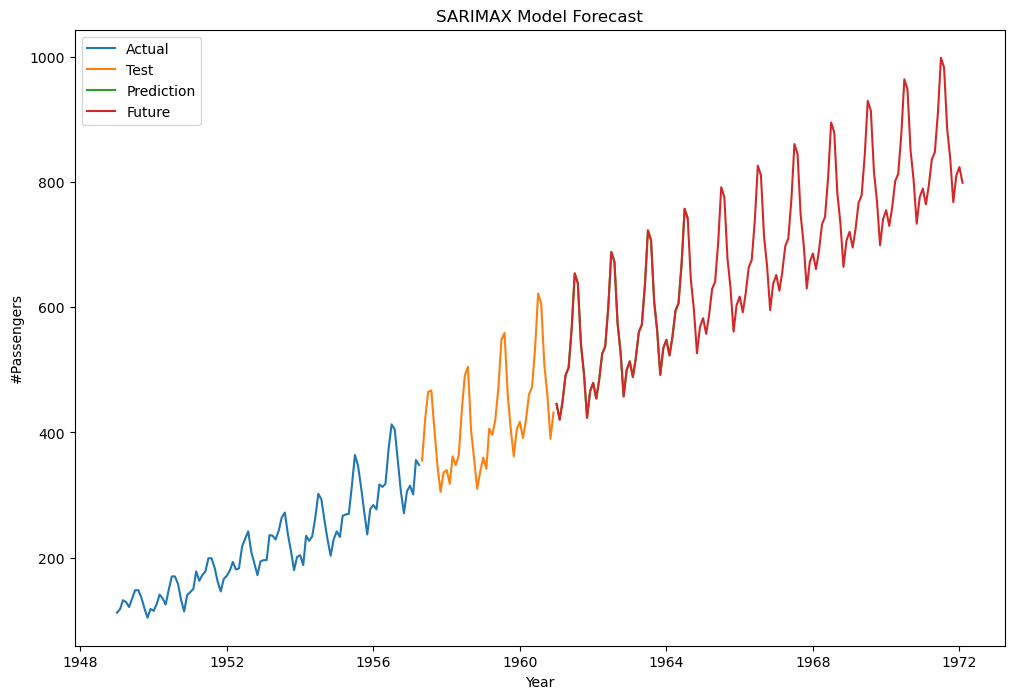

In [77]:
plt.figure(figsize=(12, 8))

plt.plot(train_df['#Passengers'], label='Actual')
plt.plot(test_df['#Passengers'], label='Test')
plt.plot(test_predictions, label='Prediction')
plt.plot(forecast_further, label='Future')


plt.title('SARIMAX Model Forecast')
plt.xlabel('Year')
plt.ylabel('#Passengers')
plt.legend()

plt.show()

In [79]:
from sklearn.metrics import mean_absolute_percentage_error
mape_test = mean_absolute_percentage_error(test_df['#Passengers'],test_predictions)
print('MAPE for TEST Data:', mape_test)

MAPE for TEST Data: 0.3820631602301439


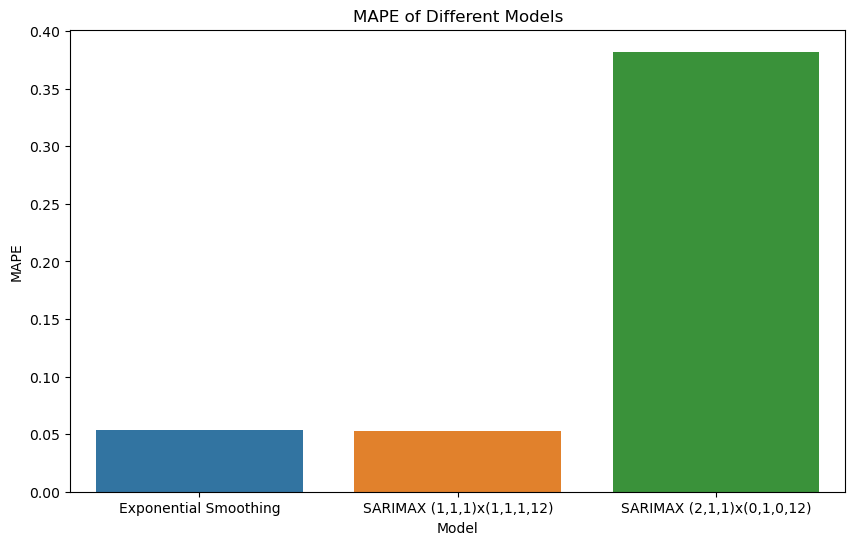

In [84]:
# prompt: plot the mape of all models make a table

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create some data for the table
models = ['Exponential Smoothing', 'SARIMAX (1,1,1)x(1,1,1,12)', 'SARIMAX (2,1,1)x(0,1,0,12)']
mape_test = [0.05397259855132907, 0.05292896562888002, 0.3820631602301439]

# Create the table
table = pd.DataFrame({'Model': models, 'MAPE Test': mape_test})

# Plot the table
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAPE Test', data=table)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('MAPE of Different Models')
plt.show()